# Sentiment Analysis For Arabic Urdu 
  
This Notebook implements the `Natural Language Processing` concept for text classification using machine learning to classify the text messages based based on their content into nagative or positive classes.

### Getting the tools Ready

In [6]:
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk

In [7]:
data=pd.read_csv("dataset/urdu_v1.tsv",sep="\t")
data.head()

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N
2,ٹویٹر کا خیال کیسے آیا ؟,O
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1000 non-null   object
 1   Class   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


/home/hassan/miniconda3/envs/nlp/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


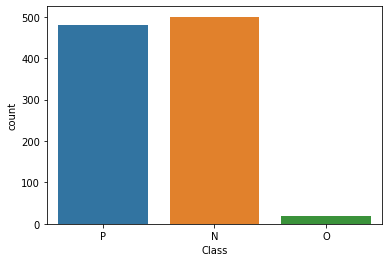

In [9]:
sns.countplot(data["Class"])

In [10]:
data=data[data["Class"]!="O"]

In [11]:
data.reset_index(drop=True)

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N
2,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P
3,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P
4,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,N
...,...,...
975,اُس آدمی نے اِس سالار کو کافی معقول ٹپ دی ہے ۔,P
976,چچا غالب کی روح سے معذرت کے ساتھہم نے مانا کہ ...,P
977,واہ جناب واہ! اچھی رہی۔ جناب خود کو فرشتہ سمجو...,P
978,اسلام آباد :پی اے ٹی کا دھرنا ختم، صفائی کے کا...,P


In [12]:
data.Class.value_counts()

N    500
P    480
Name: Class, dtype: int64

/home/hassan/miniconda3/envs/nlp/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


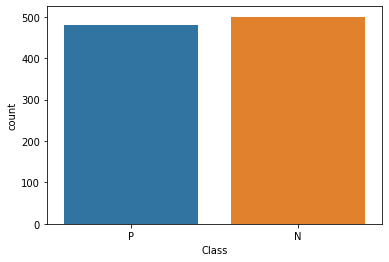

In [13]:
sns.countplot(data["Class"])

In [207]:
def clean_data(Text):    
    
        # English punctuations
        text = re.sub(r"""[!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]+""", " ", Text)
        # Urdu punctuations
        text = re.sub(r"[:؛؟’‘٭ء،۔]+", " ", text)
        # Arabic numbers
        
        text = re.sub(r"[^\w\s]", " ", text)
        # Remove English characters and numbers.
        
        text = re.sub(r"\d+", " ", text)
        # remove multiple spaces.
        text = re.sub(r" +", " ", text)
        text = text.split(" ")
        return "".join(text)

In [66]:
punctuation=string.punctuation
# clenaing data 
def clean_text(text):
        Text="".join([char for char in text if char not in punctuation])
        #Text="".join([char for char in Text if char not in urdu])
        Text=re.sub("[0-9]","",Text)
        Text = re.sub(r"[:؛؟’‘٭ء،۔]+", " ", Text)
        Text = re.sub(r"[٩٨٧٥٦٠١٢٣٤]+", " ", Text)
        Text = re.sub(r"[a-zA-z0-9]+", " ", Text)
        Text = re.sub(r" +", " ", Text)
        Text=re.split("\W",Text)
        return Text

In [67]:
data["Cleaned"]=data["Tweet"].apply(lambda x:clean_text(x))

In [68]:
data.head()

,Tweet,Class,Cleaned
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P,"[میں, نے, ایٹم, بم, بنایا, ھے, او, بھائی, ایٹم..."
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N,"[چندے, سے, انقلاب, اور, عمران, خان, وزیر, اعظم..."
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P,"[سرچ, انجن, گوگل, کے, نائب, صدر, نے, فضا, میں,..."
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P,"[, ابھی, تک, اسکی, لہریں, کبھی, کبھی, آ, جاتی,..."
5,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,N,"[, گندی, زبان, اور, گٹر, جیسے, دماغ, والے, جاه..."


In [43]:
tf=TfidfVectorizer(analyzer=clean_text)

In [44]:
Xw=tf.fit_transform(data.Tweet)
Xw.shape

(980, 4997)

In [45]:
Xw_df=pd.DataFrame(Xw.toarray(),columns=tf.get_feature_names())

In [46]:
Xw_df.head()

,,آ,آؤٹ,آؤے,آئ,آئن,آئندہ,آئوٹ,آئی,آئینہ,...,ﻭﺯﺍﺭﺕ,ﻭﻗﺖ,ﻭﻗﻔﮯ,ﻮﭦ,ﻮﮔﻮﮞ,ﻻ,ﻻﮨﻮﺭ,ﻻﮨﻮﺭﺷﮩﺮﻣﯿﮟ,ﻻﮨﻮﺭﺿﻠﻌﯽ,ﻻﺯﻡ
0,0.035418,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.085938,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.041883,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.119219,0.242763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.075864,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Feel free to use different ratios to split the data.
train_text, test_text, train_labels, test_labels = train_test_split(Xw_df,data.Class, test_size=0.2, random_state=42)

In [48]:
train_text.shape

(784, 4997)

In [49]:
test_text.shape

(196, 4997)

In [70]:

# train model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(train_text, train_labels)

# test model
test_pred = clf.predict(test_text)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred,pos_label="P", average='binary')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

acc 0.6326530612244898
precision 0.6825396825396826
rec 0.45263157894736844
f1 0.5443037974683544


In [52]:
posts=["ہماری پوری کوشش ہے کہ نواز شریف 25 دسمبر کو اپنی سالگرہ اپنوں میں منائیں - @fawadchaudhry",
       "پی ٹی آئی سے وفاقی حکومت نہیں چل رہی تو ہٹ جائے ہم چلا کر دکھائیں گے:",
       "جگہ جگہ ایسے بھٹو پہ تھوکنے والے ملیں گے"]

In [53]:
p_c=pd.Series(posts)

In [54]:
p_c

0    ہماری پوری کوشش ہے کہ نواز شریف 25 دسمبر کو اپ...
1    پی ٹی آئی سے وفاقی حکومت نہیں چل رہی تو ہٹ جائ...
2             جگہ جگہ ایسے بھٹو پہ تھوکنے والے ملیں گے
dtype: object

In [55]:
ttf=TfidfVectorizer(analyzer=clean_text,vocabulary=tf.vocabulary_)

In [56]:
tt=ttf.fit_transform(p_c)

In [58]:
clf.predict(tt)

array(['N', 'N', 'P'], dtype=object)